<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Longest_Palindromic_Substring_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Longest Palindromic Substring

Write a function that, given a string, returns its longest palindromic substring.

A palindrome is defined as a string that's written the same forward and backward. Note that single-character strings are palindromes.

You can assume that there will only be one longest palindromic substring.

Sample Input

```
string = "abaxyzzyxf"
```



Sample Output

```
"xyzzyx"

```

# Solution 1

In [1]:
# Time O(n^2)
# Space O(n)

def longestPalindromicSubstring(string):
  current_col = [None for _ in string]
  previous_col = [None for _ in string]
  previous_2_col = [None for _ in string]
  max_length = 0
  start_idx = None
  end_idx = None

  for length in range(1, len(string) + 1):
    for i in range(0, len(string) - length + 1):
      j = i + length - 1
      if length <= 2:
        palindrome = string[i] == string[j]
      elif length >= 3:
        palindrome = string[i] == string[j] and previous_2_col[i + 1]
      current_col[i] = palindrome
      if palindrome and length > max_length:
        max_length = length
        start_idx, end_idx = i, j

    previous_2_col = previous_col[:]
    previous_col = current_col[:]
      
  return string[start_idx:end_idx + 1]
    


In [2]:
string = "abaxyzzyxf"
longestPalindromicSubstring(string)

'xyzzyx'

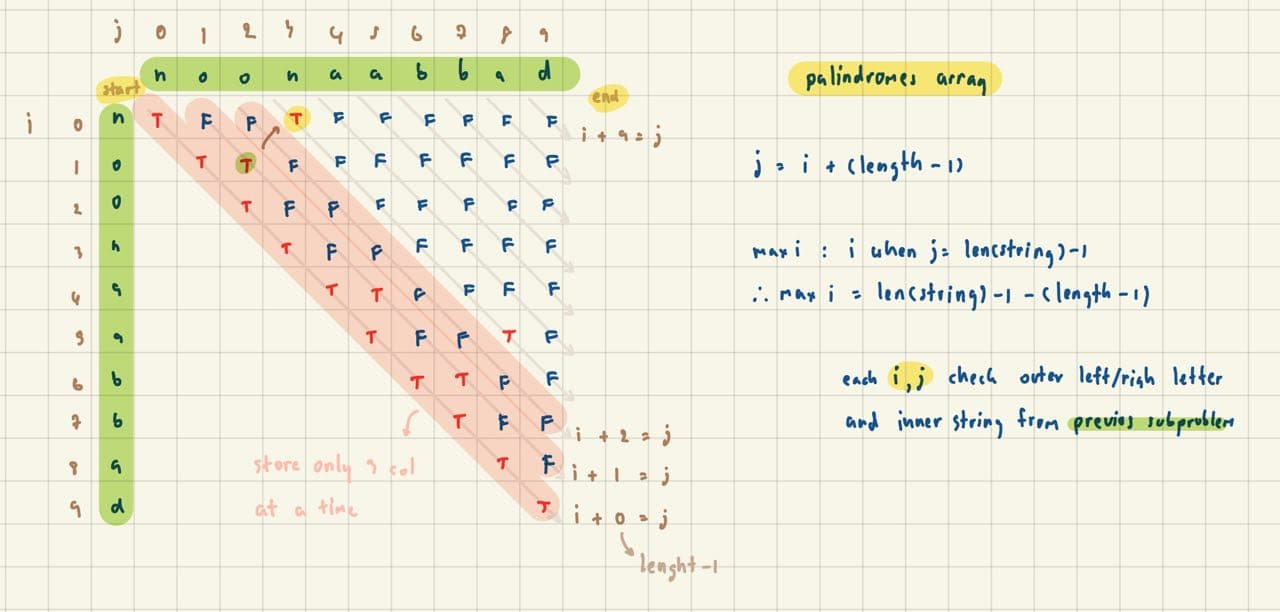

# Solution 2

- Iterate and expand

In [3]:
# Time O(n^2)
# Space O(1)

def longestPalindromicSubstring(string):
	current_longest_idx = [0, 1]
	for i in range(1, len(string)):
		odd = get_longest_palindrome_expanding(string, i - 1, i + 1)
		even = get_longest_palindrome_expanding(string, i - 1, i)
		current_longest_idx = max(odd, even, current_longest_idx, key=lambda x: x[1] - x[0])
	return string[current_longest_idx[0]: current_longest_idx[1]]

def get_longest_palindrome_expanding(string, left_idx, right_idx):
	while left_idx >= 0 and right_idx <= len(string) - 1:
		if string[left_idx] != string[right_idx]:
			break
		left_idx -= 1
		right_idx += 1
	return [left_idx + 1, right_idx]

In [4]:
string = "abaxyzzyxf"
longestPalindromicSubstring(string)

'xyzzyx'